In [2]:
# from IPython.display import Image
from PIL import Image
import pandas as pd

## Metrics optimization overview

**Metrics**
- 왜 metric들이 그렇게 많은지
    - 알고리즘을 평가할 수 있는 measure가 매우 많음
    - 현업에서도 우리의 문제를 어떤 measure로 평가할지를 정해야함.
        - 예를 들면 컬리가 웹사이트의 효율성을 높이고자 한다면, 효율성을 식으로 나타내야할 것임



- 왜 대회에서 얘네가 중요한지
    - 어떤 metric을 최적화하느냐에 따라 score가 달라지기 때문.
        - 시계열 문제에서 loss를 이렇게 정의할 수도 잇는 것임. trend가 맞으면 MAE가 loss이고, trend가 틀리면 MSE가 loss인 것임.

**Loss와 Metric의 차이**

**젤 중요한 metric들 알아보기**

1. Regression
    - MSE, RMSE, R-squared
    - MAE
    - (R)MSPE, MAPE
    - (R)MSLE


2. Classification
    - Accuracy, LogLoss, AUC
    - Cohen's(quadratic weighted) Kappa

**metrics optimization technique**

# Metrics Optimization for regression

### 1. MSE:Mean Square Error

$$ 
MSE(y, \hat y) = \frac{1}{N} \sum_{i=1}^N (\hat y_i - y_i)^2
$$

아래와 같은 데이터가 있을 때, 예측 값이 어떤 constant일 때 가장 mse가 낮을까?

grid search로 구해보면 10.99 정도 되는데, 평균 값인 11과 매우 유사함

밑에 빨간 plot은 위의 형형색색 plot들을 평균낸값과 같다.

### 2. RMSE(Root MSE)
RMSE는 MSE와 매우 비슷하다. MSE에 루트만 씌워주면 된다.

- 루트의 역할은? scale을 target 값의 scale에 맞춰주기 위하여.

**RMSE와 MSE가 비슷한 점.**
1. MSE에서의 minimizer = RMSE에서의 minimizer
2. MSE(a) > MSE(b) <=> RMSE(a) > RMSE(b)
> RMSE가 metric이라면 MSE를 metric으로 사용해도 된다.
> MSE가 RMSE보다 optimize하기 쉽기 때문에 MSE사용 ㄱㄱ

**RMSE와 MSE가 다른 점**
1. RMSE의 gradient와 MSE의 gradient가 다르다.
> RMSE의 gradient는 MSE의 gradient에다가 MSE에 의존하는 어떤 상수배 이다. 
> 그래서 learning rate가 RMSE는 MSE의 값에 영향을 받는다.

**metric으로는 MSE와 RMSE를 바꿔쓸 수 있지만, gradient based method에서는 바꿔쓸 수 없다.** 

### 3. R-squared
**R2 = 1 - ( MSE / 평균으로 예측한 것의 MSE ).**

즉, 

R2 = 1 => MSE = 0

R2 = 0 => 우리의 예측이 평균으로 예측한 것과 동일

내가 만든 모델의 MSE가 성능이 상중하 중 어느정도 일지 궁금할 때 R2 ㄱㄱ

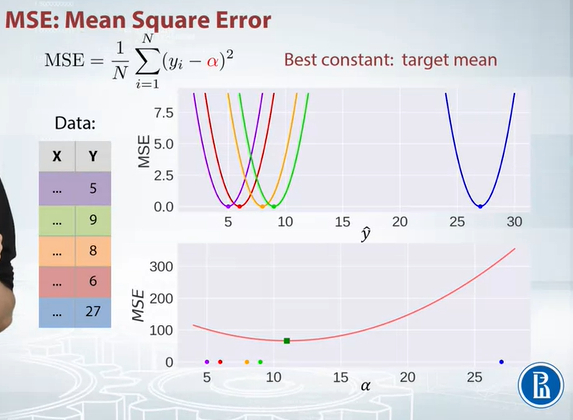

In [10]:
Image.open('img1.png')

### 4. MAE: Mean Absolute Error

$$ 
MAE(y, \hat y) = \frac{1}{N} \sum_{i=1}^N |\hat y_i - y_i|
$$

- MSE보다 outlier에 덜 민감하다 => robust
- MAE의 optimal constant = median 값.
- gradient
    - step function. yhat < y => -1, yhat > y => 1
    - y = yhat 이면 gradient는 정의되지 않음. 이런 일이 많지는 않기 때문에 if문으로 처리 하면 됨.
    - 2차 미분은 항상 0

### ※ MAE vs MSE
- 데이터에 outlier가 있다면?
    - MAE
    
- 진짜 그게 outlier라면?
    - MAE
    
- unusaul한 값이 상식적으로 말이 되는 값이고, 빈도가 매우 적을 때
    - MSE

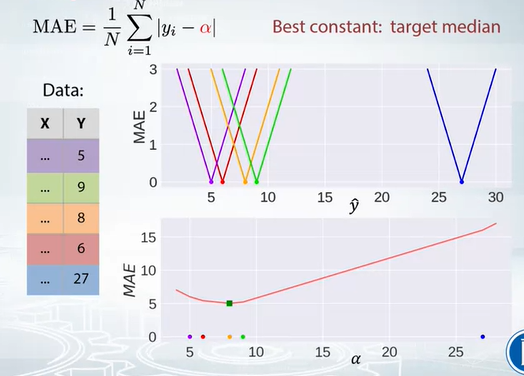

In [11]:
Image.open('img2.png')

### 5. (R)MSPE & (R)MAPE
$$ 
\hat y = 9,  y = 10 → MSE = 1 
$$
$$
\hat y = 999,  y = 1000 → MSE = 1 
$$

$$
\hat y = 9,  y = 10 → MSE = 1 
$$
$$
\hat y = 900,  y = 1000 → MSE = 10000 
$$

- 위 경우는 MSE 와 MSE가 absolute error를 취급하기 때문에 발생하는 것
- 이럴 때는 상대적인 error를 측정하는 것이 중요

$$
\hat y = 9,  y = 10 → relative-metric = 1 
$$
$$
\hat y = 900,  y = 1000 → relative-metric = 1 
$$

- 아래 그림을 보면 MSE와 MAE는 항상 동일한 모양의 error curve.
- MSPE, MAPE는 어떤 값이냐에 y가 어떤 값이냐에 따라 다른 모양의 error curve
- 각각 MSE MAE에 y값으로 weight를 준 형태

**curve를 보면 y값이 클수록 loss가 별로 안 커짐**

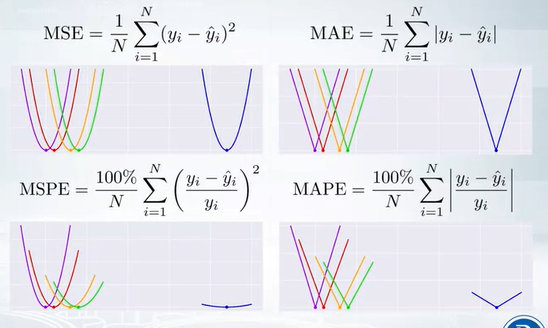

In [3]:
Image.open('img3.png')

### MSPE, MAPE 에서의 optimal constant

#### MSPE = weighted target mean
- target 값이 작을 수록 cost가 강하기 때문에 작은 값 쪽으로 biased

#### MAPE = weighted target median
- 많이 쓰이는 애는 아님
- MSPE보다 더 작은 값.
- outlier가 매우매우 작은 값이라면, optimal constant는 매우 작은 값으로 갈 것임

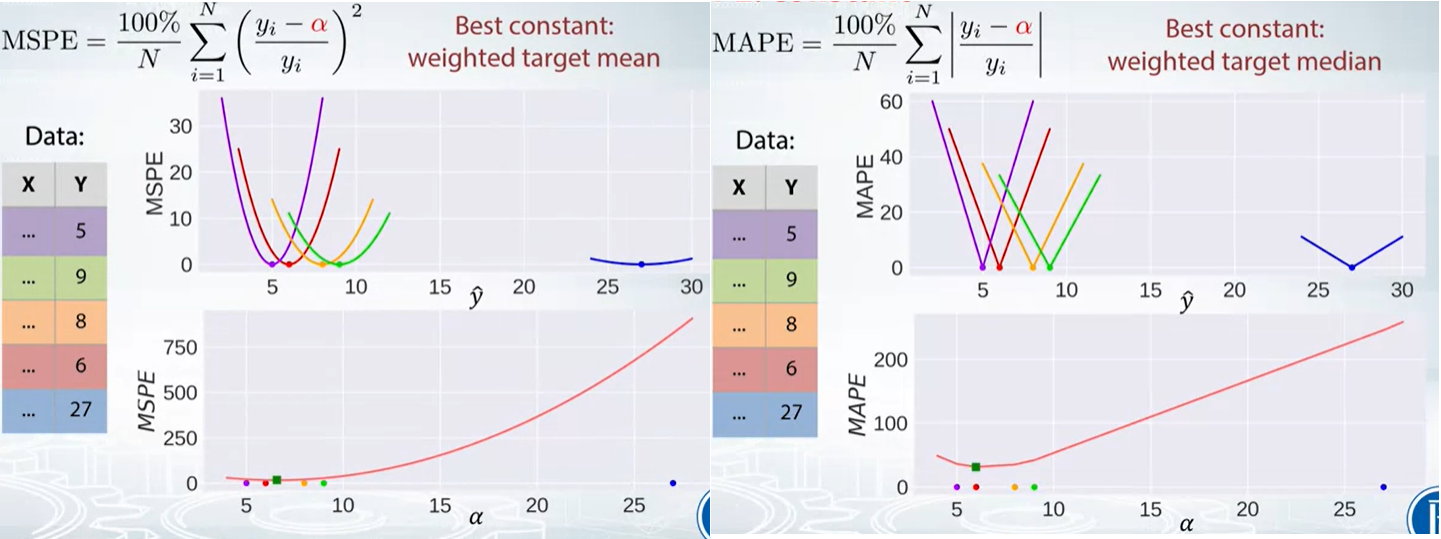

In [6]:
Image.open('img4.png')

### 6. RMSLE(Root Mean Square Logarithmic Error)
$$ 
RMSLE = RMSE(log(y_i + 1) - log(\hat y_i + 1)) = \sqrt{MSE(log(y_i + 1) - log(\hat y_i + 1))}
$$

1이라는 상수는 다른거로 바꿀수 잇음

- MSPE나 MAPE와 비슷한 상황에서 사용
- 하지만 curve가 비대칭.
- **무조건 더 크게 예측하는 것이 더 좋게 나온다.** => 예측 값의 분포가 더 작은 쪽에 몰려있을 때 사용하면 좋을 metric인 듯.
- 루트 빼도 계산 가능(MSE와 RMSE처럼). 하지만 루트 있는 것이 더 많이 쓰임.

### RMSLE의 optimal constant
log 취한 target에서의 RMSE optimal constant를 찾고, 거기다가 exponentiate 하면 됨

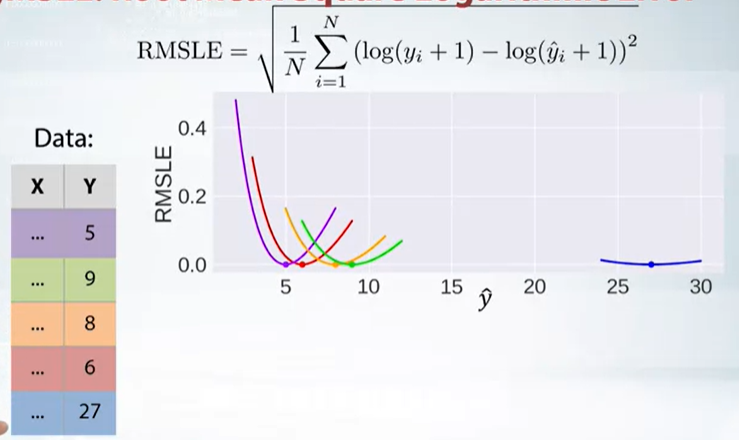

In [8]:
Image.open('img5.png')

In [17]:
pd.DataFrame({'Metric' : ['MSE','RMSLE','MAE','MSPE','MAPE'],
             'Constant' : [11,9.11,8,6.6,6],
             'etc' : ['큰 값에 biased','MAPE보다 덜 biased & relative 고려 → 더 좋은 metric','MSE 보다 덜 biased', '작은 값에 biased','작은 값에 biased']})

,Metric,Constant,etc
0,MSE,11.00,큰 값에 biased
1,RMSLE,9.11,MAPE보다 덜 biased & relative 고려 → 더 좋은 metric
2,MAE,8.00,MSE 보다 덜 biased
3,MSPE,6.60,작은 값에 biased
4,MAPE,6.00,작은 값에 biased
